In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
river1 = pd.read_excel("/content/Cauvery.xlsx")
river2 = pd.read_excel("/content/Godavari.xlsx")
river3 = pd.read_excel("/content/Krishna.xlsx")
river4 = pd.read_excel("/content/Mahanadi.xlsx")

In [ ]:
river1["River"] = "Cauvery"
river2["River"] = "Godavari"
river3["River"] = "Krishna"
river4["River"] = "Mahanadi"

In [ ]:
merged_data = pd.concat([river1, river2, river3, river4], ignore_index=True)


In [ ]:
merged_data.to_csv("merged_rivers.csv", index=False)

print("Merged dataset saved as 'merged_rivers.csv'")

Merged dataset saved as 'merged_rivers.csv'


In [ ]:
df=pd.read_csv("/content/merged_rivers.csv")

In [ ]:
df.head(11)

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood,River
0,1998-01-01,548.0,0.0,0.63,NaN,0.0,Cauvery
1,1998-01-02,548.0,0.0,0.63,NaN,0.0,Cauvery
2,1998-01-03,548.0,0.0,0.63,NaN,0.0,Cauvery
3,1998-01-04,468.0,0.0,0.54,NaN,0.0,Cauvery
4,1998-01-05,652.0,0.0,0.75,NaN,0.0,Cauvery
5,1998-01-06,422.0,0.0,0.48,NaN,0.0,Cauvery
6,1998-01-07,441.0,0.0,0.50,4.15,0.0,Cauvery
7,1998-01-08,490.0,0.0,0.56,4.09,0.0,Cauvery
8,1998-01-09,480.0,0.0,0.55,4.01,0.0,Cauvery
9,1998-01-10,629.0,0.0,0.72,4.10,0.0,Cauvery


In [ ]:
df.describe()

,Discharge,flood runoff,daily runoff,weekly runoff,Flood
count,29867.000000,30680.000000,30680.000000,30656.000000,30680.000000
mean,2357.269662,0.151304,1.104033,7.727906,0.033960
std,2684.505307,2.332168,1.166204,7.787739,0.418138
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,660.500000,0.000000,0.390000,2.920000,0.000000
50%,1495.000000,0.000000,0.770000,5.470000,0.000000
75%,2944.500000,0.000000,1.410000,9.810000,0.000000
max,30154.000000,93.400000,14.150000,93.870000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30680 entries, 0 to 30679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           30680 non-null  object 
 1   Discharge      29867 non-null  float64
 2   flood runoff   30680 non-null  float64
 3   daily runoff   30680 non-null  float64
 4   weekly runoff  30656 non-null  float64
 5   Flood          30680 non-null  float64
 6   River          30680 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
30675,False
30676,False
30677,False
30678,False


In [ ]:
df.isnull().sum()

,0
Date,0
Discharge,813
flood runoff,0
daily runoff,0
weekly runoff,24
Flood,0
River,0


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
df_cleaned.to_csv("merged_rivers_cleaned.csv", index=False)

print("Cleaned dataset saved as 'merged_rivers_cleaned.csv'")

Cleaned dataset saved as 'merged_rivers_cleaned.csv'


In [ ]:
df=pd.read_csv("/content/merged_rivers_cleaned.csv")
df

,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood,River
0,1998-01-07,441.0,0.0,0.50,4.15,0.0,Cauvery
1,1998-01-08,490.0,0.0,0.56,4.09,0.0,Cauvery
2,1998-01-09,480.0,0.0,0.55,4.01,0.0,Cauvery
3,1998-01-10,629.0,0.0,0.72,4.10,0.0,Cauvery
4,1998-01-11,658.0,0.0,0.75,4.32,0.0,Cauvery
...,...,...,...,...,...,...,...
29838,2018-12-27,3678.0,0.0,2.60,20.34,0.0,Mahanadi
29839,2018-12-28,3799.0,0.0,2.69,21.33,0.0,Mahanadi
29840,2018-12-29,3541.0,0.0,2.51,21.22,0.0,Mahanadi
29841,2018-12-30,3945.0,0.0,2.79,20.36,0.0,Mahanadi


In [ ]:
df['Flood'] = (df['Flood'] > 0).astype(int)
X = df[["Discharge", "flood runoff", "daily runoff", "weekly runoff"]]
y = df["Flood"].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n Model: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))


 Model: Logistic Regression
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       0.99      0.88      0.93        86

    accuracy                           1.00      5969
   macro avg       0.99      0.94      0.97      5969
weighted avg       1.00      1.00      1.00      5969


 Model: Decision Tree
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       1.00      1.00      1.00        86

    accuracy                           1.00      5969
   macro avg       1.00      1.00      1.00      5969
weighted avg       1.00      1.00      1.00      5969


 Model: Random Forest
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       1.00      1.00      1.00        86

    accuracy                           1.00      5969
   ma

In [ ]:
flood_by_river = df.groupby("River")["Flood"].sum().sort_values(ascending=False)
print("\n Flood Count by River:")
print(flood_by_river)

worst_river = flood_by_river.idxmax()
print(f"\n River causing most floods: {worst_river}")


 Flood Count by River:
River
Cauvery     147
Krishna     111
Godavari    101
Mahanadi     96
Name: Flood, dtype: int64

 River causing most floods: Cauvery


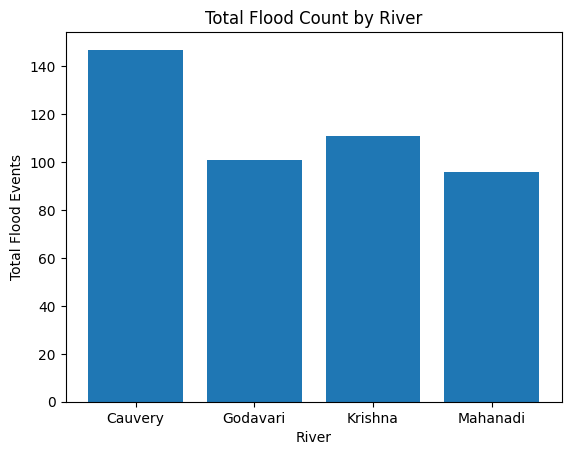

In [ ]:
flood_by_river = df.groupby("River")["Flood"].sum()

plt.bar(flood_by_river.index, flood_by_river.values)
plt.xlabel("River")
plt.ylabel("Total Flood Events")
plt.title("Total Flood Count by River")
plt.show()

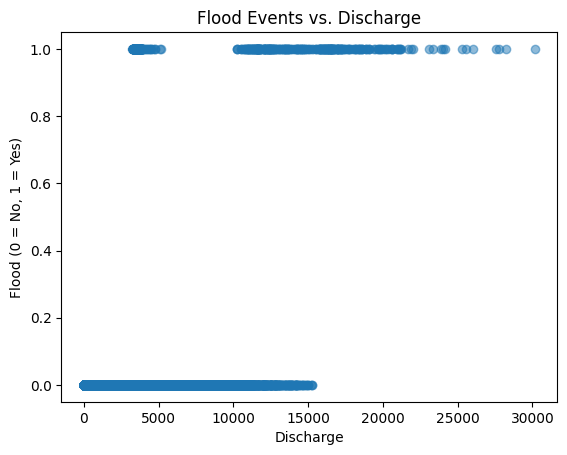

In [ ]:
plt.scatter(df["Discharge"], df["Flood"], alpha=0.5)
plt.xlabel("Discharge")
plt.ylabel("Flood (0 = No, 1 = Yes)")
plt.title("Flood Events vs. Discharge")
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR


    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    outliers[col] = ((df[col] < lower) | (df[col] > upper)).astype(int)

    print(f"{col}: {outlier_rows.shape[0]} outliers")

Discharge: 2390 outliers
flood runoff: 480 outliers
daily runoff: 2031 outliers
weekly runoff: 2073 outliers
Flood: 455 outliers


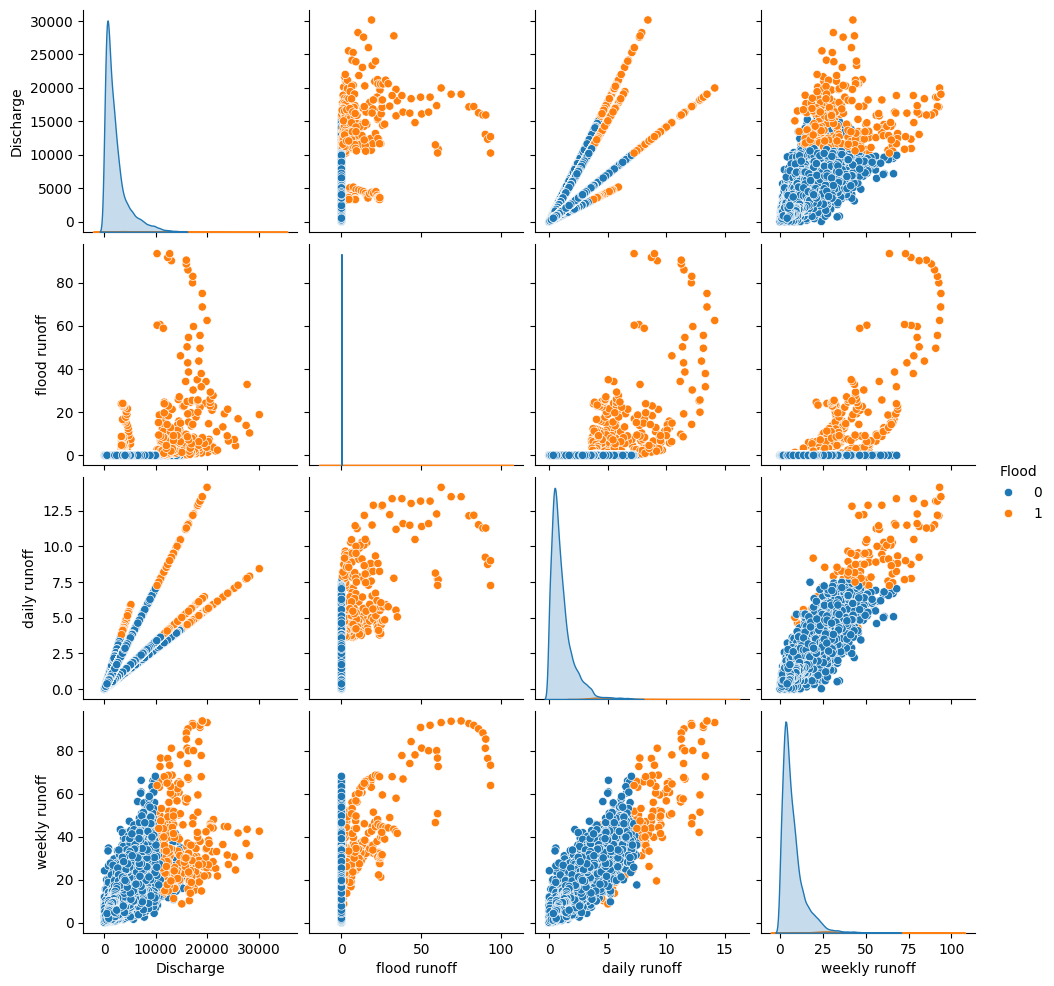

In [ ]:
sns.pairplot(df[["Discharge", "flood runoff", "daily runoff", "weekly runoff", "Flood"]], hue="Flood")
plt.show()

In [ ]:
# Select numeric columns to scale
numeric_cols = ["Discharge", "flood runoff", "daily runoff", "weekly runoff"]

# Create a scaler object
scaler = StandardScaler()

# Fit and transform numeric features
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save or use scaled data
df_scaled.to_csv("merged_rivers_scaled.csv", index=False)

print(" Dataset scaled and saved as 'merged_rivers_scaled.csv'")
print(df_scaled.head())

 Dataset scaled and saved as 'merged_rivers_scaled.csv'
         Date  Discharge  flood runoff  daily runoff  weekly runoff  Flood  \
0  1998-01-07  -0.714017     -0.065377     -0.543402      -0.485550      0   
1  1998-01-08  -0.695769     -0.065377     -0.492022      -0.493252      0   
2  1998-01-09  -0.699493     -0.065377     -0.500585      -0.503522      0   
3  1998-01-10  -0.644004     -0.065377     -0.355009      -0.491968      0   
4  1998-01-11  -0.633204     -0.065377     -0.329319      -0.463726      0   

     River  
0  Cauvery  
1  Cauvery  
2  Cauvery  
3  Cauvery  
4  Cauvery  


In [ ]:
df_scaled['Flood'] = (df_scaled['Flood'] > 0).astype(int)
X = df_scaled[["Discharge", "flood runoff", "daily runoff", "weekly runoff"]]
y = df_scaled["Flood"].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n Model: {name}")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))


 Model: Logistic Regression
Accuracy: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       0.99      0.88      0.93        86

    accuracy                           1.00      5969
   macro avg       0.99      0.94      0.97      5969
weighted avg       1.00      1.00      1.00      5969


 Model: Decision Tree
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       1.00      1.00      1.00        86

    accuracy                           1.00      5969
   macro avg       1.00      1.00      1.00      5969
weighted avg       1.00      1.00      1.00      5969


 Model: Random Forest
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5883
           1       1.00      1.00      1.00        86

    accuracy                           1.00      5969
   ma

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv("/content/merged_rivers_cleaned.csv")

In [ ]:
X = df[["Discharge", "flood runoff", "daily runoff", "weekly runoff"]]
y = df["Flood"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}


In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })


In [ ]:
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values(by="R² Score", ascending=False))


Model Comparison:
               Model  R² Score       MAE      RMSE
1      Decision Tree  0.980490  0.003552  0.064484
2      Random Forest  0.980334  0.003758  0.064740
0  Linear Regression  0.717629  0.040068  0.245318


In [ ]:
flood_by_river = df.groupby("River")["Flood"].sum().sort_values(ascending=False)
print("\n Flood Count by River:")
print(flood_by_river)

worst_river = flood_by_river.idxmax()
print(f"\n River causing most floods: {worst_river}")


 Flood Count by River:
River
Cauvery     286.1
Krishna     267.2
Mahanadi    256.9
Godavari    222.5
Name: Flood, dtype: float64

 River causing most floods: Cauvery


In [ ]:
# Select numeric columns only
numeric_cols = ["Discharge", "flood runoff", "daily runoff", "weekly runoff", "Flood"]

outliers = pd.DataFrame()

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify outliers
    df[f"{col}_outlier"] = ((df[col] < lower) | (df[col] > upper)).astype(int)

    print(f"{col}: {df[f'{col}_outlier'].sum()} outliers")


Discharge: 2390 outliers
flood runoff: 480 outliers
daily runoff: 2031 outliers
weekly runoff: 2073 outliers
Flood: 455 outliers


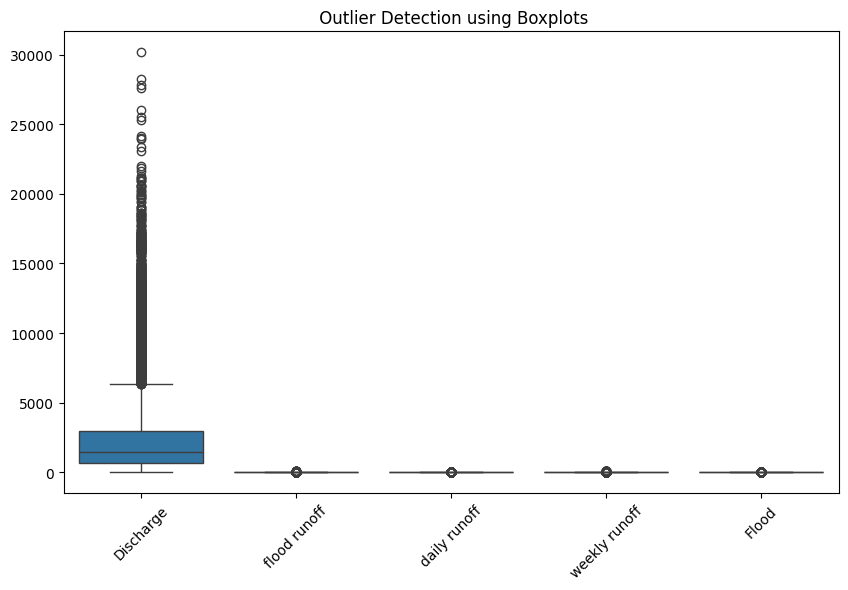

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Discharge", "flood runoff", "daily runoff", "weekly runoff", "Flood"]])
plt.title(" Outlier Detection using Boxplots")
plt.xticks(rotation=45)
plt.show()

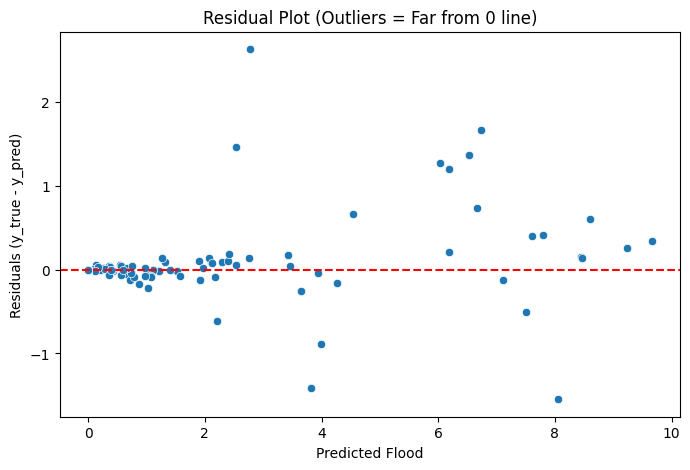

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split and scale
X = df[["Discharge", "flood runoff", "daily runoff", "weekly runoff"]]
y = df["Flood"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and compute residuals
y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Outliers = Far from 0 line)")
plt.xlabel("Predicted Flood")
plt.ylabel("Residuals (y_true - y_pred)")
plt.show()


In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))


In [ ]:
numeric_cols = ["Discharge", "flood runoff", "daily runoff", "weekly runoff", "Flood"]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count remaining outliers
    remaining = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {remaining} remaining outliers")


Discharge: 0 remaining outliers
flood runoff: 0 remaining outliers
daily runoff: 0 remaining outliers
weekly runoff: 0 remaining outliers
Flood: 0 remaining outliers


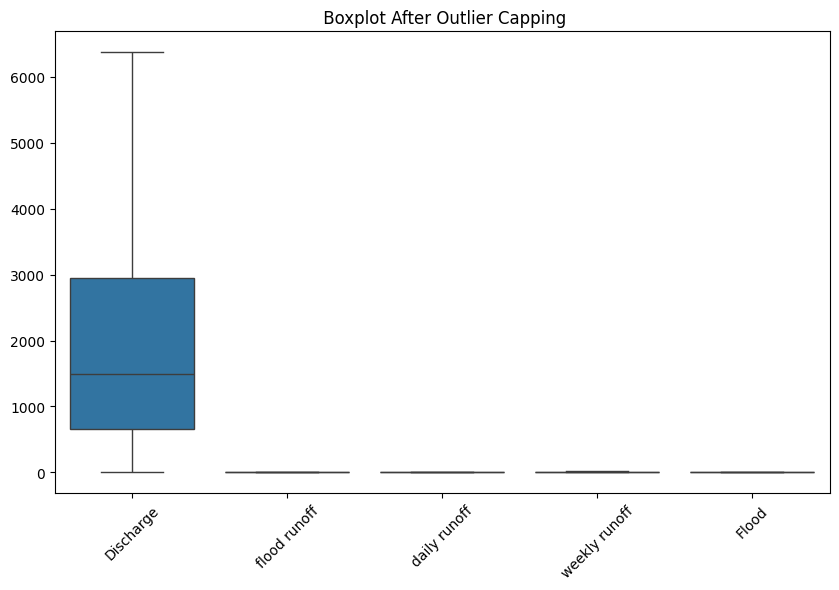

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title(" Boxplot After Outlier Capping")
plt.xticks(rotation=45)
plt.show()


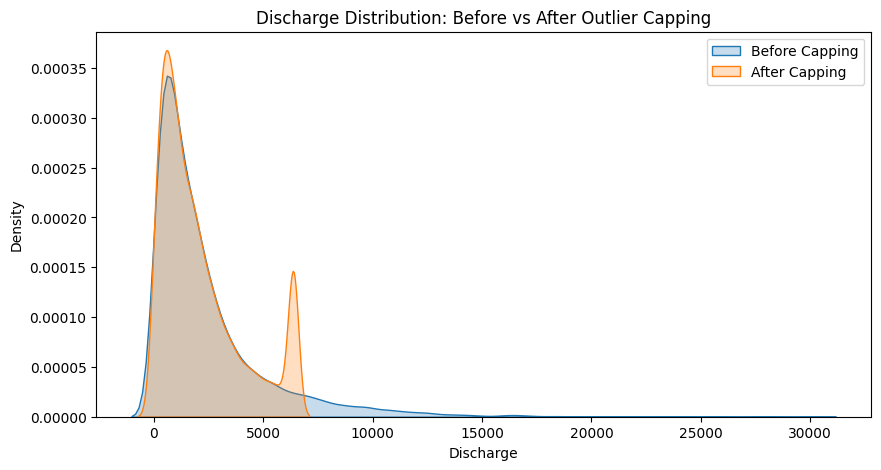

In [ ]:
df_before_capping = pd.read_csv("/content/merged_rivers_cleaned.csv")

plt.figure(figsize=(10,5))
sns.kdeplot(df_before_capping["Discharge"], label="Before Capping", fill=True)
sns.kdeplot(df["Discharge"], label="After Capping", fill=True)
plt.title("Discharge Distribution: Before vs After Outlier Capping")
plt.legend()
plt.show()